<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/TA_Sessions/craps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Operations Research - Simulation
#### Bart Bennett / Ignacio Lara
#### Spring 2022
<hr />

# The Game of Craps
![craps](https://www.palacestation.com/wp-content/uploads/2020/02/PS-Craps-scaled.jpg)

It is easy to find the craps pit at any casino - just follow the sounds of yelling and cheering, or look for the swarms of up to 16 players, 4 casino staff, a grisly-looking pit boss, and stacks upon stacks of chips. Often regarded as the most exciting casino game, craps caters to a wide range of bettors by offering a variety of betting choices, some of which have the lowest house edges of any table game besides blackjack, and some of which (snake eyes or railroad tracks) pay out at **30 to 1**!

There are too many options to delve into detail on all of them, but we can focus on the most fundamental craps bet (which also comes with the smallest house edge): the **pass line bet**.

## Basic Rules

Craps is played in **rounds**. Each round starts in the **come out** phase, and if the round does not end in the come out phase, then it enters the **point** phase. The rules vary based on whether the round is in the come out or point phase:

### Come out

The first roll of a round is the come-out roll (every roll in craps is played with two dice). For those who bet the **pass line** (also known as betting "with the shooter"), the come-out roll can win on a "natural," lose on a "craps," or advance to the "point phase" otherwise:
* Natural (round ends / pass line wins): 7 or 11
* Craps (round ends / pass line loses): 2, 3, or 12
* Point (round continues): 4, 5, 6, 8, 9, 10

### Point phase

If the come out roll did not result in a Natural or a Craps, then the value of the roll becomes the **point** for that round. The only special numbers for the pass line bet are the point, and 7. The pass line bet cannot be withdrawn until it is decided, and it:
* Wins if the shooter rolls the point again before rolling a 7
* Loses if the shooter rolls a 7 before rolling the point again. This is known as a "7 out," because all bets on the table are decided, and the shooter cannot roll again until the dice come all the way around the table.

The point phase ends when the shooter either "makes their point" or "sevens out," and a new round begins in the come-out.

### Examples

Each example starts with a new round (in the come-out):
* 7: Natural - Pass line wins
* 4: Point phase (Point is 4)
  * 6: Continue
  * 3: Continue
  * 9: Continue
  * 7: 7-out - Pass line loses
* 3: Craps - Pass line loses
* 10: Point phase (Point is 10)
  * 11: Continue
  * 2: Continue
  * 12: Continue
  * 4: Continue
  * 10: Point - Pass line wins

## Implementing in Python

There are few key takeaways to consider when trying to come up with a simulation in Python:

1. We need to know whether we are in the come-out or point phase, because the rules change. One way to implement this is a boolean 'flag' that is `True` if we are in the come out phase, and `False` if we are not (i.e. we are in the point phase).
1. We don't know ahead of time how many rolls a round will take. This type of control flow lends itself to a `while` loop, which relies on another boolean (true/false) condition to know when the exit criterion is met.

As always, we start by importing the libraries we will use:
#### Import Libraries

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

### Win/Loss Logic

Next let's write a couple of functions that determine the outcome of a roll in the come out phase and point phase (different functions for each phase because they represent different rule sets). 

We use the `pass_line_wins` boolean to represent whether the bet wins (`True`), loses (`False`), or remains undecided (`None`). The `result` variable gives us more context around the roll: if the bet is decided, `result` tells us how the win or loss occurred; if the round continues, then `result` just represents the value of the roll it was given.

Note that the functions return two values, `result` and `pass_line_wins` (technically, functions can never return multiple values...these functions return a `tuple` object of length 2).

In [ ]:
def come_out_roll(roll):
  pass_line_wins = None
  result = ''

  if roll == 7 or roll == 11:
    result = '>> Natural!'
    pass_line_wins = True
  elif roll <= 3 or roll == 12:
    result = 'Craps'
    pass_line_wins = False
  else:
    result = roll

  return result, pass_line_wins


def point_roll(roll, point):
  pass_line_wins = None
  result = ''

  if roll == 7:
    result = '7-out'
    pass_line_wins = False
  elif roll == point:
    result = '>> Point!'
    pass_line_wins = True
  else:
    result = roll

  return result, pass_line_wins

In [ ]:
print(come_out_roll(8))
print(point_roll(7, 10))

(8, None)
('7-out', False)


### A round of Craps

Finally, we're ready to play a round. The first two variables are the boolean flags that implement our flow control: `is_come_out` decides which win/loss logic is run for that roll, and `pass_line_wins` will indicate when the round is over (either `True` or `False`); it is `None` while the round is in progress.

The pseudo-code for our function representing one round of Craps (`craps_round()`) is:
1. Is the round over? If no, then:
1. Roll two fair dice, and obtain the total value (sum) of the roll.
1. Are we in the come out or point phase? Evaluate the outcome of the roll depending on the phase.
1. Repeat until round is over, then return the outcome of the round (reason and win/loss).

Lastly, `iter_craps()` is just a convenient function to run multiple rounds, and store the `result` and `pass_line_wins` values separately to make analysis easier. For example:
* `results` might look like: `['Craps', '7-out', '7-out', '>> Point!', '>> Natural!']` and
* `wins` would then be: `[False, False, False, True, True]`


In [ ]:
def craps_round(print_rolls=False):
  is_come_out = True
  pass_line_wins = None
  result = None

  while pass_line_wins is None:
    dice = random.choices(range(1, 7), k=2)
    roll = sum(dice)
    if print_rolls:
      print(dice, roll)

    if is_come_out: # Come out phase
      point, pass_line_wins = come_out_roll(roll)
      if pass_line_wins is None:
        is_come_out = False
      else:
        result = point
    else: # Point phase
      result, pass_line_wins = point_roll(roll, point)

  return result, pass_line_wins


def iter_craps(iters=10):
  rounds = [craps_round() for i in range(iters)]
  results, wins = zip(*rounds)
  #mean_val = np.mean([1 if win else -1 for win in wins])
  return results, wins #, mean_val

##A Set of Rounds

To use simulation to predict the expected value, multiple replications of a single run are calculated.  For example, the iter_craps function, by default, replicates (or iterates) 10 rounds. The function could be called with some other number of replications.  Whatever this number of replications, the combination of these rounds is sometimes called a "set".  Thus, the default set is 10 rounds.

In [ ]:
results, wins = iter_craps()
print(results)
print(wins)

('7-out', 'Craps', '>> Natural!', '7-out', '7-out', '7-out', '>> Natural!', '>> Point!', '>> Point!', '7-out')
(False, False, True, False, False, False, True, True, True, False)


## Riches or Ruin?

Now that we have a working simulation of our game, we can decide whether it is one worth playing. It should be intuitive that casinos would never offer games that lose them money in the long run; indeed, every casino game is negative in expectation for the player. The fun from gambling comes in the chance to get lucky with variance (and go on a "hot streak").

First, let's look at the theory to confirm that the house does indeed win:

### A little probability

Recall that the pass line bet pays even money when it wins (either by a Natural or by making the point), and that the bet is decided entirely on rolls of two fair dice. The probabilities associated with the sums of two fair dice rolls are:
* 2 or 12: $1/36$ each
* 3 or 11: $2/36$ each
* 4 or 10: $3/36$ each
* 5 or 9: $4/36$ each
* 6 or 8: $5/36$ each
* 7: $6/36$

Note that 7 is the most likely outcome, hence why it plays such a central role in Craps! We're interested in the probability of the pass line bet winning in a given round (again, either via a Natural or by making the point). Let's start with the outcomes of the come out roll only:
* Chance of Natural (7 or 11): $6/36 + 2/36 = 8/36$
* Chance of Craps (2, 3, or 12): $1/36 + 2/36 + 1/36 = 4/36$
* Chance of advancing to Point phase: $(36-12)/36 = 24/36$

Now we can look at the point phase. Like we said earlier, the only rolls that matter in the point phase are the point, and 7. So we can **condition** our outcomes for a particular roll on the _requirement_ that the roll is either a 7 or the point. 

For example, let's say the point was 4. Then the bet is only decided if a roll is 7 or 4, no other outcome is relevant. Thus the probability of winning the bet (the probability of "making a point of 4") is the probability of rolling a 4, **conditioned** on the roll being either a 4 or a 7. In math, the probability of making a point $x$ on a random roll $X$ is:

$$
\begin{aligned}
\Pr(\text{win/make point } x) &= \Pr(X = x \: | \: X \in \{x, 7\}) \\
& \\
&= \frac{\Pr(X=x)}{\Pr(X=x) + \Pr(X=7)}
\end{aligned} 
$$

Using this rule, the probability of making the point is:
* Point 4 or 10: $\frac{3/36}{3/36 + 6/36} = 1/3$
* Point 5 or 9: $\frac{4/36}{4/36 + 6/36} = 2/5$
* Point 6 or 8: $\frac{5/36}{5/36 + 6/36} = 5/11$

We're almost there. To get the probability of making _any_ point, we need to weight the win probabilities for each point value by the probability of "setting" that point value, i.e. it is less likely to establish a point of 4 in the first place than a point of 6, so the probabilities of making the point need to be weighted appropriately. If we let the set $\mathcal{P}$ represent all of the possible point values (i.e. $\mathcal{P} = \{4, 5, 6, 8, 9, 10\}$), then the probability of making any point becomes:

$$
\Pr(\text{make any point}) = \sum_{x \in \mathcal{P}}\bigg[\Pr(X=x) \times \frac{\Pr(X=x)}{\Pr(X=x) + \Pr(X=7)} \bigg]
$$

\\

| Point | Probability of establishing | Probability of making | Joint Probability |
| --- | --- | --- | --- |
| 4 or 10 | 3/36 each = 6/36 | 1/3 | 2/36 |
| 5 or 9 | 4/36 each = 8/36 | 2/5 | 4/45|
| 6 or 8 | 5/36 each = 10/36 | 5/11 | 25/198 |

\\
$$
\Pr(\text{make any point}) = 2/36 + 4/45 + 25/198 \approx 0.2707
$$

Finally, the probability of winning a round can be represented as the sum of the possible win conditions (i.e., a natural or making a point):

$$
\begin{aligned}
\Pr(\text{win round}) &= \Pr(\text{natural}) + \Pr(\text{make any point}) \\
&= 8/36 + 0.2707 \approx 0.4929
\end{aligned}
$$

So, we can expect to win against the house roughly 49.3% of the time. Since we profit \\$1 for every win (\\$2 pay-out minus \\$1 wager), and lose \\$1 for every loss, our expected payoff is then: 

$$
\mathbb{E}(V) = 0.4929($1) + 0.5071(-$1) \approx -$0.0142
$$

Another way to think of this is to say that the game will pay you \\$2 if you win, and nothing if you lose (they keep your entry fee). How much would you be willing to pay to play the game?

$$
\mathbb{E}(V) = 0.4929($2) + 0.5071($0) \approx $0.9858
$$

Since we have to "pay" \\$1 to start the game (the first wager can be thought of as your "buy-in," or entry price), this game is not worth it in expectation. 

In [ ]:
results, wins = iter_craps(1000000)

mean_val = np.mean([1 if win else -1 for win in wins])
print('A set of 1,000,000 rounds:')
print('Estimated probability of winning: %6.4f' % (np.mean(wins)))
print('Estimated expected value: %7.4f' % (mean_val))

A set of 1,000,000 rounds:
Estimated probability of winning: 0.4933
Estimated expected value: -0.0133


### Can we get lucky?

We've confirmed that if we played the pass line forever, the house would win in the end. But let's look at how lucky we can be in the short term. 

In [ ]:
names, counts = np.unique(results, return_counts=True)

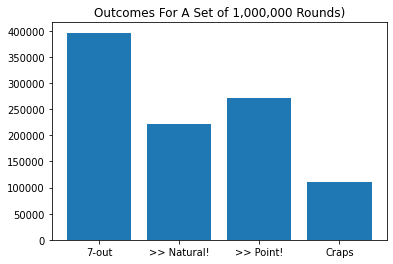

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Outcomes For A Set of 1,000,000 Rounds)')
ax.bar(range(len(counts)), counts, tick_label=names)
plt.show()

##Reducing the Number of Replications
To estimate the expected value of a simulation or the mean of any other outcome, we can average the outcomes of a large number of replications.  But, there is a better way that typically reduces the replications that need to be run.  Furthermore, this approach also opens the door to other statistical methods.

First, recall that the averages of unbiased population subsamples of equal size are more normally distributed than the sample itself.  Second, if the subsample size if large enough, the subsample averages will be sufficiently normally distributed.  Third, the required subsample size depends of the skewness of the original distribution.

To demonstrate this with this game, let's take set lengths (rounds/set or subpopulation sizes) of 10, 100, 1,000, aand 10,0000.  For each of these set lengths, we will calculate 1,000 averages and then print the average of the averages and the standard deviation of the averages, and plot the distribution of the averages.

Subpopulation    10 rounds/set: estimated expected value -0.0220, standard deviation 0.3050, time    0.10
Subpopulation   100 rounds/set: estimated expected value -0.0124, standard deviation 0.1027, time    0.87
Subpopulation  1000 rounds/set: estimated expected value -0.0146, standard deviation 0.0315, time    8.63
Subpopulation 10000 rounds/set: estimated expected value -0.0143, standard deviation 0.0105, time   99.08


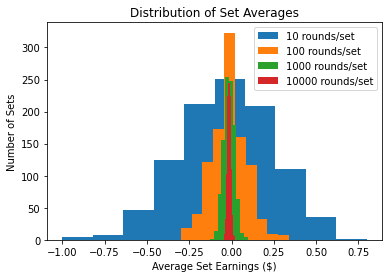

In [ ]:
results = []
elapsed_time = [0]*4
num_reps = 1000
set_lengths = [10, 100, 1000, 10000]

for i in set_lengths:
  s = set_lengths.index(i)
  elapsed_time[s] -= time.time()
  totals = np.empty(num_reps)
  for j in range(num_reps):
    __, wins = iter_craps(i)
    totals[j] = np.mean([1 if win else -1 for win in wins])
  elapsed_time[s] += time.time()

  results.append(totals)
  plt.hist(totals, label='{} rounds/set'.format(i), stacked=True)
  print('Subpopulation %5d rounds/set: estimated expected value %7.4f, standard deviation %6.4f, time %7.2f' % (i, np.mean(totals), np.std(totals), elapsed_time[s]))

plt.title('Distribution of Set Averages')
plt.xlabel('Average Set Earnings ($)')
plt.ylabel('Number of Sets')
plt.legend()
plt.show()

We can also plot these averages in another way - as box plots.  This shows us how the subsample size impacts the estimate of the expected value and the range of the set averages.

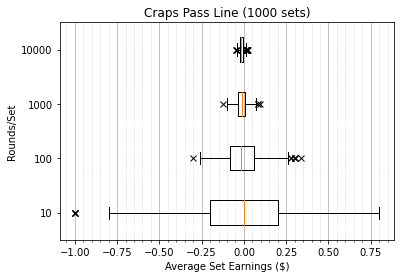

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Craps Pass Line ({} sets)'.format(num_reps))
ax.set_xlabel('Average Set Earnings ($)')
ax.set_ylabel('Rounds/Set')
ax.boxplot(results, vert=False, labels=set_lengths, sym='x')
ax.grid(visible=True, axis='x', which='both')
ax.grid(linestyle=':', linewidth=0.5, which='minor', axis='x')
ax.minorticks_on()
ax.tick_params(left=False, axis='y', which='minor')
plt.show()